Iteration 1/1000, Best Fitness: 1351.45
Iteration 2/1000, Best Fitness: 1286.64
Iteration 3/1000, Best Fitness: 1258.02
Iteration 4/1000, Best Fitness: 1237.45
Iteration 5/1000, Best Fitness: 1237.45
Iteration 6/1000, Best Fitness: 1237.45
Iteration 7/1000, Best Fitness: 1237.45
Iteration 8/1000, Best Fitness: 1237.45
Iteration 9/1000, Best Fitness: 1237.45
Iteration 10/1000, Best Fitness: 1237.45
Iteration 11/1000, Best Fitness: 1237.45
Iteration 12/1000, Best Fitness: 1237.45
Iteration 13/1000, Best Fitness: 1226.76
Iteration 14/1000, Best Fitness: 1226.76
Iteration 15/1000, Best Fitness: 1205.11
Iteration 16/1000, Best Fitness: 1205.11
Iteration 17/1000, Best Fitness: 1205.11
Iteration 18/1000, Best Fitness: 1205.11
Iteration 19/1000, Best Fitness: 1205.11
Iteration 20/1000, Best Fitness: 1205.11
Iteration 21/1000, Best Fitness: 1205.11
Iteration 22/1000, Best Fitness: 1205.11
Iteration 23/1000, Best Fitness: 1205.11
Iteration 24/1000, Best Fitness: 1205.11
Iteration 25/1000, Best F

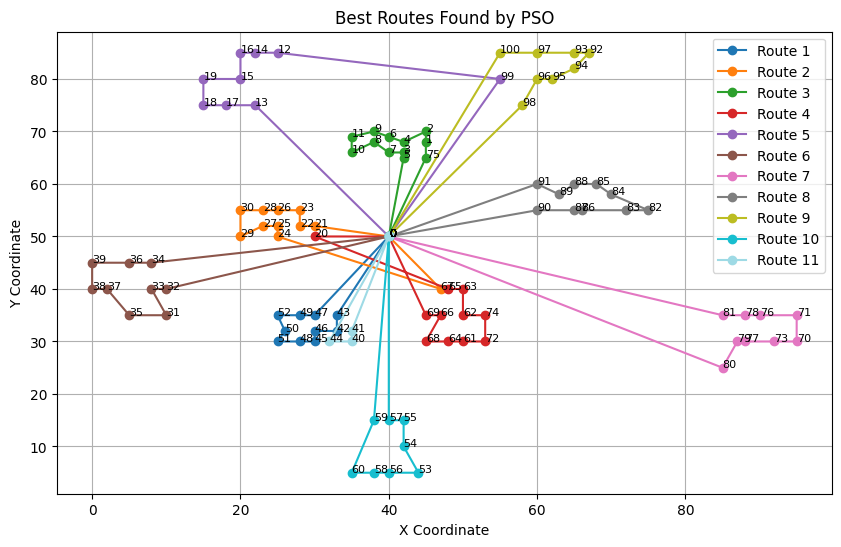

Iteration 1/1000, Best Distance: 2040.60
Iteration 2/1000, Best Distance: 1900.77
Iteration 3/1000, Best Distance: 1801.78
Iteration 4/1000, Best Distance: 1603.08
Iteration 5/1000, Best Distance: 1603.08
Iteration 6/1000, Best Distance: 1603.08
Iteration 7/1000, Best Distance: 1536.66
Iteration 8/1000, Best Distance: 1536.66
Iteration 9/1000, Best Distance: 1498.78
Iteration 10/1000, Best Distance: 1498.78
Iteration 11/1000, Best Distance: 1458.84
Iteration 12/1000, Best Distance: 1226.27
Iteration 13/1000, Best Distance: 1226.27
Iteration 14/1000, Best Distance: 1226.27
Iteration 15/1000, Best Distance: 1226.27
Iteration 16/1000, Best Distance: 1226.27
Iteration 17/1000, Best Distance: 1226.27
Iteration 18/1000, Best Distance: 1226.27
Iteration 19/1000, Best Distance: 1226.27
Iteration 20/1000, Best Distance: 1226.27
Iteration 21/1000, Best Distance: 1226.27
Iteration 22/1000, Best Distance: 1226.27
Iteration 23/1000, Best Distance: 1226.27
Iteration 24/1000, Best Distance: 1226.27
I

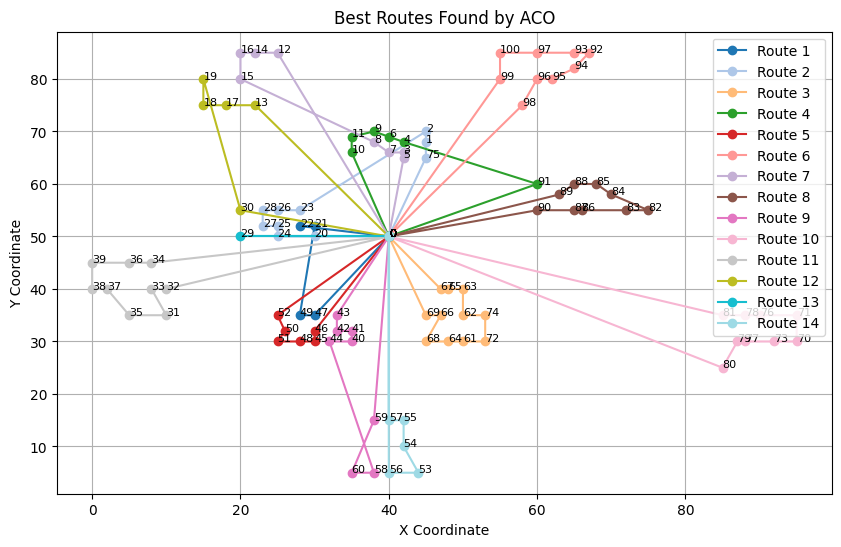

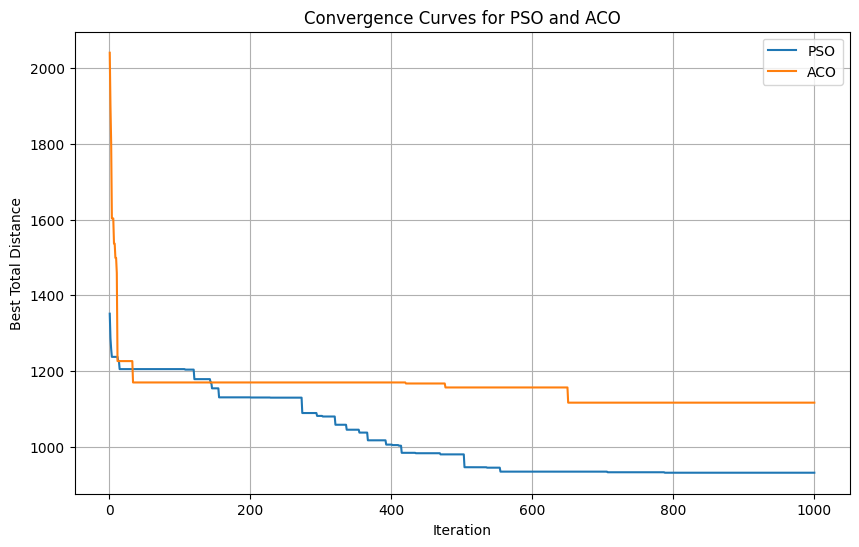


Comparison of PSO and ACO:
  Algorithm  Total Distance  Number of Vehicles Used  Execution Time (s)
0       PSO      931.501806                       11           45.777363
1       ACO     1116.513210                       14          552.346540


In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# getting the right directory
current_dir = os.getcwd()
project_root = os.path.join(current_dir, 'VRPTW', 'vrptw_code')
sys.path.append(project_root)

# imports from VRPTW folder
from models.problem_instance import ProblemInstance
from algorithms.pso import ParticleSwarmOptimization
from algorithms.aco import AntColonyOptimization

# Main Execution
if __name__ == "__main__":

    # having correct path with VRPTW folder
    FILENAME = os.path.join(current_dir, 'VRPTW', 'c101.txt')
    problem = ProblemInstance(FILENAME)

    # PSO Parameters
    NUM_PARTICLES = 100          # increasing number of particles
    NUM_ITERATIONS_PSO = 1000    # increasing number of iterations
    C1 = 2.0                   # reducing Cognitive coefficient
    C2 = 2.0                  # reducing Social coefficient

    # initialize PSO
    pso = ParticleSwarmOptimization(
        problem_instance=problem,
        num_particles=NUM_PARTICLES,
        num_iterations=NUM_ITERATIONS_PSO,
        c1=C1,
        c2=C2
    )

    # PSO extracting data and getting a collection og metrics
    start_time_pso = time.time()
    best_solution_pso, best_distance_pso, pso_convergence = pso.run()
    end_time_pso = time.time()
    pso_execution_time = end_time_pso - start_time_pso
    num_vehicles_pso = len(best_solution_pso)

    print("\nBest Total Distance by PSO:", best_distance_pso)
    print("Number of Vehicles Used by PSO:", num_vehicles_pso)
    print("PSO Execution Time (s):", pso_execution_time)
    print("Best Solution Routes by PSO:")
    for route_index, route in enumerate(best_solution_pso):
        route_int = [int(node) for node in route]
        print(f"Route {route_index + 1}: {route_int}")

    # visualization for PSO
    plt.figure(figsize=(10, 6))
    nodes = [problem.depot] + problem.customers
    colors = plt.get_cmap('tab20', num_vehicles_pso)

    

    for route_index, route in enumerate(best_solution_pso):
        x = [nodes[node].x for node in route]
        y = [nodes[node].y for node in route]
        plt.plot(x, y, marker='o', color=colors(route_index), label=f'Route {route_index + 1}')
        for node in route:
            plt.text(nodes[node].x, nodes[node].y, str(node), fontsize=8)

    plt.title('Best Routes Found by PSO')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ACO parameters
    NUM_ANTS = 100
    NUM_ITERATIONS = 1000
    ALPHA = 1.0
    BETA = 3.0
    EVAPORATION_RATE = 0.1
    Q = 100

    # initialize ACO
    aco = AntColonyOptimization(
        problem_instance=problem,
        num_ants=NUM_ANTS,
        num_iterations=NUM_ITERATIONS,
        alpha=ALPHA,
        beta=BETA,
        evaporation_rate=EVAPORATION_RATE,
        Q=Q
    )

    # ACO extracting data and getting a collection og metrics
    start_time_aco = time.time()
    best_solution_aco, best_distance_aco, aco_convergence = aco.run()
    end_time_aco = time.time()
    aco_execution_time = end_time_aco - start_time_aco
    num_vehicles_aco = len(best_solution_aco)

    print("\nBest Total Distance by ACO:", best_distance_aco)
    print("Number of Vehicles Used by ACO:", num_vehicles_aco)
    print("ACO Execution Time (s):", aco_execution_time)
    print("Best Solution Routes by ACO:")
    for route_index, route in enumerate(best_solution_aco):
        route_int = [int(node) for node in route]
        print(f"Route {route_index + 1}: {route_int}")

    # visualization for ACO
    plt.figure(figsize=(10, 6))
    nodes = [problem.depot] + problem.customers
    colors = plt.get_cmap('tab20', num_vehicles_aco)


    for route_index, route in enumerate(best_solution_aco):
        x = [nodes[node].x for node in route]
        y = [nodes[node].y for node in route]
        plt.plot(x, y, marker='o', color=colors(route_index), label=f'Route {route_index + 1}')
        for node in route:
            plt.text(nodes[node].x, nodes[node].y, str(node), fontsize=8)

    plt.title('Best Routes Found by ACO')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # plotting convergence curves for report
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pso_convergence)+1), pso_convergence, label='PSO')
    plt.plot(range(1, len(aco_convergence)+1), aco_convergence, label='ACO')
    plt.title('Convergence Curves for PSO and ACO')
    plt.xlabel('Iteration')
    plt.ylabel('Best Total Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

    # using DataFrame for comparison
    data = {
        'Algorithm': ['PSO', 'ACO'],
        'Total Distance': [best_distance_pso, best_distance_aco],
        'Number of Vehicles Used': [num_vehicles_pso, num_vehicles_aco],
        'Execution Time (s)': [pso_execution_time, aco_execution_time]
    }

    df = pd.DataFrame(data)
    print("\nComparison of PSO and ACO:")
    print(df)
